In [33]:
import numpy as np
from scipy import linalg
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
A = np.array([[1, -2, 4,2], [3,-5,3,1], [2,4,-3,1], [2,5,-6,3]])
b = np.array([2, -2, -7, -3])
print(A)
b

[[ 1 -2  4  2]
 [ 3 -5  3  1]
 [ 2  4 -3  1]
 [ 2  5 -6  3]]


array([ 2, -2, -7, -3])

In [8]:
# Giải hệ phương trình Ax = b
A1 = np.linalg.inv(A) # Ma trận nghịch đảo của A
print("Nghiệm của pt là ", A1@b)

Nghiệm của pt là  [-2.82926829 -1.10731707 -0.35609756  2.0195122 ]


In [9]:
# Giải hệ bằng lệnh Linalg.solve()
np.linalg.solve(A,b)

array([-2.82926829, -1.10731707, -0.35609756,  2.0195122 ])

In [13]:
# Giải hệ bằng phân tích LU
P,L,U =linalg.lu(A)
print(P)
print(L)
print(U)

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[ 1.          0.          0.          0.        ]
 [ 0.66666667  1.          0.          0.        ]
 [ 0.33333333 -0.04        1.          0.        ]
 [ 0.66666667  0.88        0.76119403  1.        ]]
[[ 3.         -5.          3.          1.        ]
 [ 0.          8.33333333 -8.          2.33333333]
 [ 0.          0.          2.68        1.76      ]
 [ 0.          0.          0.         -3.05970149]]


In [18]:
lu, piv=linalg.lu_factor(A)
print(lu)
piv # Ánh xạ hàng i của A hoán vị với hàng piv(i)

[[ 3.         -5.          3.          1.        ]
 [ 0.66666667  8.33333333 -8.          2.33333333]
 [ 0.33333333 -0.04        2.68        1.76      ]
 [ 0.66666667  0.88        0.76119403 -3.05970149]]


array([1, 3, 3, 3], dtype=int32)

In [19]:
linalg.lu_solve((lu, piv), b)

array([-2.82926829, -1.10731707, -0.35609756,  2.0195122 ])

In [24]:
x0 = np.ones(5)
x1 = np.array([1.1, 1.3, 1.5,2,2.2])
X = np.vstack([x0,x1]).T
print(X)
Y = np.array([39343, 46205, 37731, 43525, 39891])
print(Y)
np.linalg.solve(X.T@X, X.T@Y)

[[1.  1.1]
 [1.  1.3]
 [1.  1.5]
 [1.  2. ]
 [1.  2.2]]
[39343 46205 37731 43525 39891]


array([41517.05069124,  -109.9078341 ])

### Mô hình hồi quy có dạng $y = 41517 - 109x$

In [27]:
# Sử dụng hàm lstsq() để tìm tham số mô hình: y = XB + e
np.linalg.lstsq(X,Y, rcond=None)

(array([41517.05069124,  -109.9078341 ]),
 array([47544450.79262676]),
 2,
 array([4.33112456, 0.48099902]))

[1.44969743 2.47922845 4.54051496 0.38478194 0.25204471 2.15830121
 1.91829448 2.12243824 1.37106802 1.56576298 4.25662966 4.13726804
 1.88709924 3.89992151 4.0282667  4.77060373 0.66356719 4.16290888
 0.92747242 1.04077147 3.12686641 1.58014605 1.37204117 2.84800146
 1.42151994 0.41442425 1.2497231  4.30286466 2.9685581  2.66930455
 2.79464219 4.56158622 4.7332067  1.40483925 0.63024868 2.76509664
 2.68782182 1.16189624 3.17451311 3.36585116 0.66332298 0.34992611
 4.92150023 4.17778782 2.83977405 2.75011963 1.97312377 4.6869943
 1.91428904 4.97203363 1.00697129 3.37632386 0.96435509 1.9198558
 1.51112127 3.27955455 4.24560609 3.70775919 1.79048953 3.30506937
 3.3725103  3.61139764 2.15461225 2.15225129 2.65489474 1.29654316
 3.81031966 2.85415478 1.99441456 2.62287175 1.06850972 1.5530349
 1.7059592  0.39218687 4.95723335 4.09450191 2.18046411 3.51053997
 3.6154077  4.64970513 3.92144579 2.85163441 0.36600018 2.55065136
 1.80534216 3.05321727 2.92459893 4.68319924 0.69967828 1.6720220

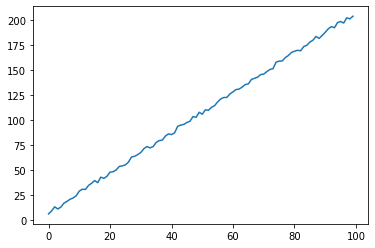

In [52]:
# Khởi tạo dữ liệu
n = 100
e =  5 * np.random.rand(n)
print(e)
x = np.arange(100)
y = 5 + 2 * x + e
# Biểu diễn bảng
df = pd.DataFrame(np.vstack([x,y]).T, columns=['x', 'y'])
# Vẽ đồ thị
plt.plot(x, y)

In [53]:
model = LinearRegression(fit_intercept=False)
X = np.vstack([np.ones(n), x]).T
model.fit(X, y)
print("Cac tham so cua mo hinh: ", model.coef_)

Cac tham so cua mo hinh:  [7.40942751 2.00302375]


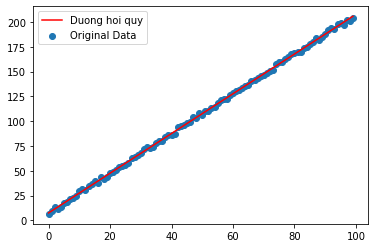

In [54]:
# Vẽ đồ thị
plt.scatter(x, y, label="Original Data")
yfit = model.predict(X)
plt.plot(x,yfit, label="Duong hoi quy", color="red")
plt.legend()
plt.show()